## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

sns.set() # for just seeing all plots in seaborn style!
%matplotlib inline

## Importing the Dataset

In [2]:
dataset = pd.read_csv('house_train.csv')

## Exploratory Data Analysis

In [3]:
dataset.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Univariate Analysis - Dependent Variable Analysis ( Sale Price )

In [6]:
dataset['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

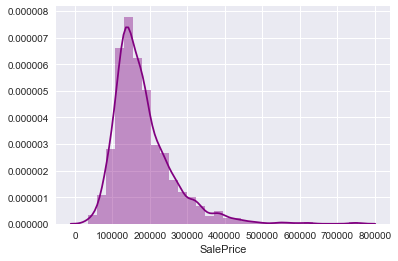

In [7]:
sns.distplot(dataset['SalePrice'], bins=30, color='purple')

#### Ok.. seems good... 1. Normal Distribution  2. Positive Skewness 

In [8]:
# Skewness and Kurtosis
print("Skewness: ", dataset['SalePrice'].skew())
print("Kurtosis: ", dataset['SalePrice'].kurt())

Skewness:  1.8828757597682129
Kurtosis:  6.536281860064529


### Multivariate Analysis - numericals with dependet

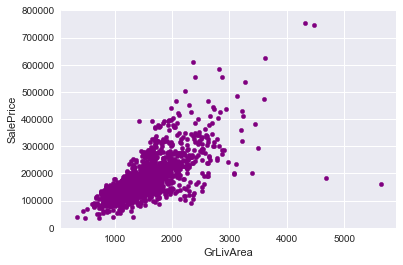

In [9]:
# GrLivArea with SalePrice
data = pd.concat([dataset['SalePrice'], dataset['GrLivArea']], axis=1)
# max = 755000.000000 ( from describe() ) so let's set ylim to 800000
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0, 800000), color='purple')

### This funnel shape is the sign of non constant variance (heteroscedasticity)

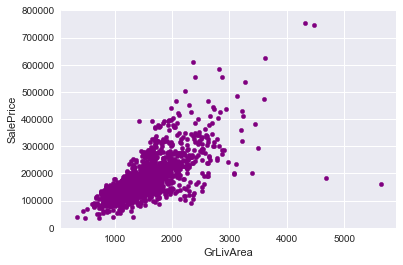

In [10]:
'''
Let's handle heteroscedasticity to avoid violation of Regression Assumption
you can do a non linear transformation of predictors such as log (X), √X or X² transform the dependent variable.
''' 

data_1 = pd.concat([dataset['SalePrice'], np.sqrt(dataset['GrLivArea']**(10**(-1)))], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000), color='purple')
# play with functions to get a good result

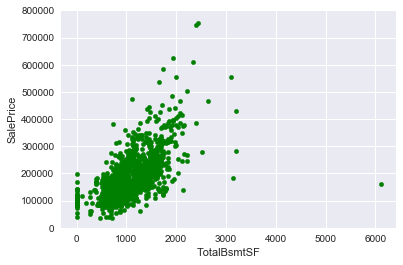

In [11]:
# TotalBsmtSF and SalePrice
data_2 = pd.concat([dataset['TotalBsmtSF'], dataset['SalePrice']], axis=1)
data_2.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000), color='green')

#### This feature also has a heteroscedasticity problem

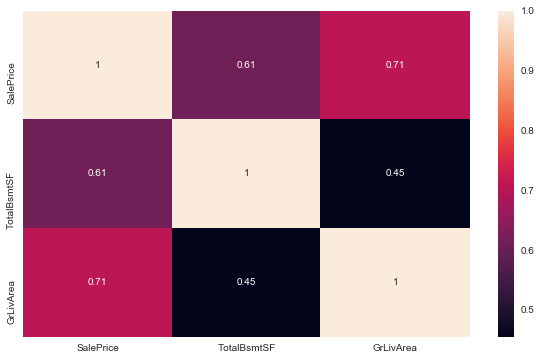

In [12]:
data_corr = dataset[['SalePrice', 'TotalBsmtSF', 'GrLivArea']]
plt.figure(figsize=(10,6))
sns.heatmap(data_corr.corr(),annot=True)

### Multivariate Analysis - Categoricals with dependet

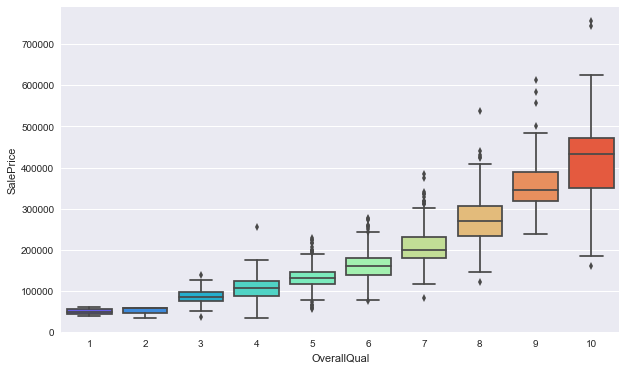

In [13]:
# OverallQual (Overal Quality) with SalePrice
data_3 = pd.concat([dataset['SalePrice'], dataset['OverallQual']], axis=1)
plt.figure(figsize=(10,6))
sns.boxplot(data=data_3, x='OverallQual', y='SalePrice', palette='rainbow')

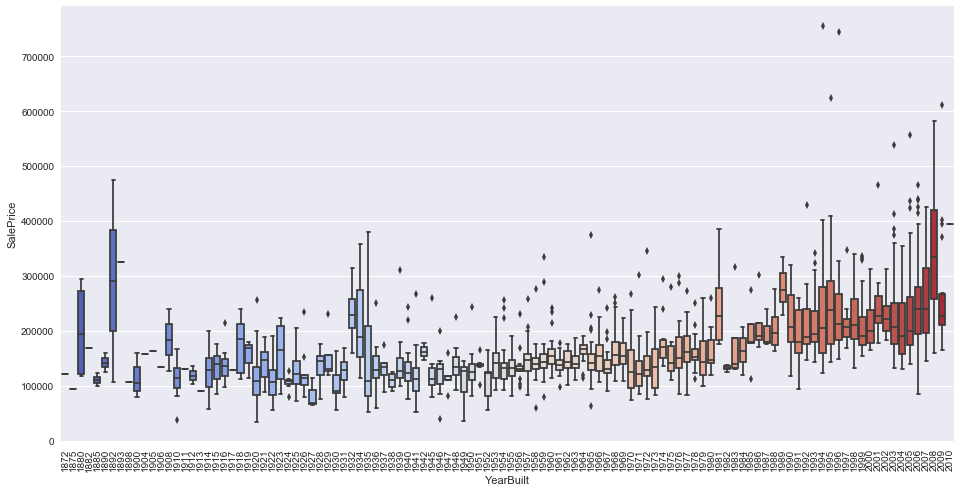

In [14]:
# YearBuilt with SalePrice
data_4 = pd.concat([dataset['SalePrice'], dataset['YearBuilt']], axis=1)
plt.figure(figsize=(16,8))
sns.boxplot(data=data_4, x='YearBuilt', y='SalePrice', palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

## SUMMARY
### NUMERICAL
GrLivArea' and 'TotalBsmtSF' linearly related with sale prices. In the case of 'TotalBsmtSF', slope of linear relation is higher than 'GrLivArea'
GrLivArea seems more correlated to SalePrice based on the heatmap
### CATEGORICAL
'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'.
in overal quality box plot we can clearly see the relation between quality and the prices

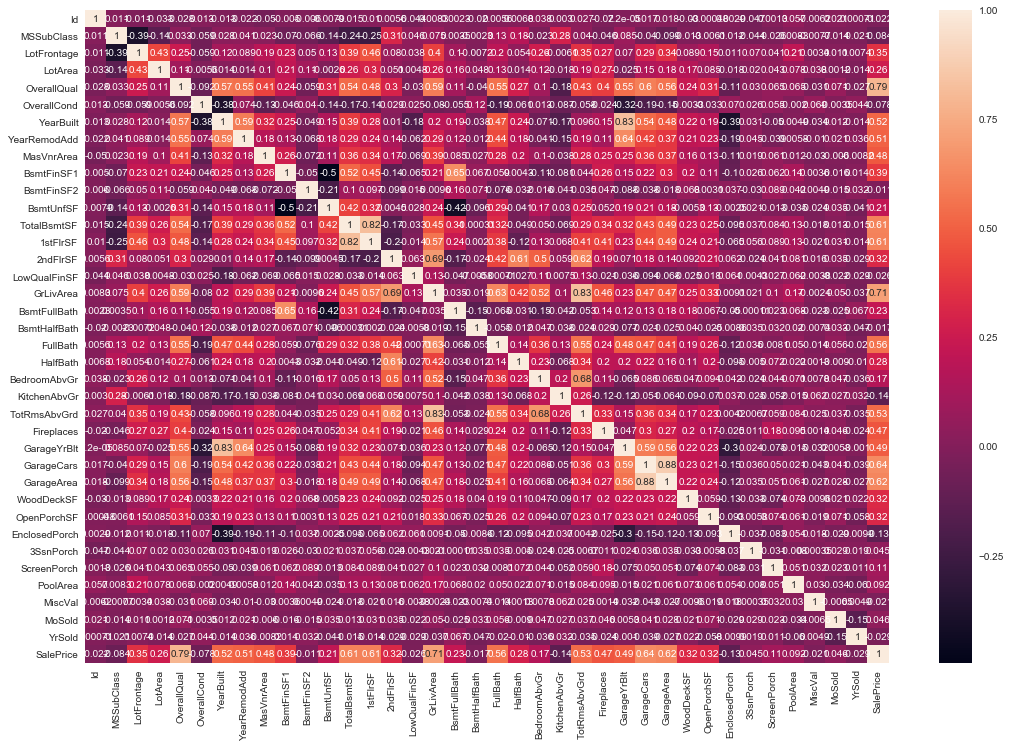

In [15]:
# Correlation Matrix
correlation_matrix = dataset.corr()
plt.figure(figsize=(18,12))
sns.heatmap(correlation_matrix, annot=True)

'TotalBsmtSF' - '1stFlrSF'  and  garage features  ; are highly correlated and that means we have Multicolinearity
between them

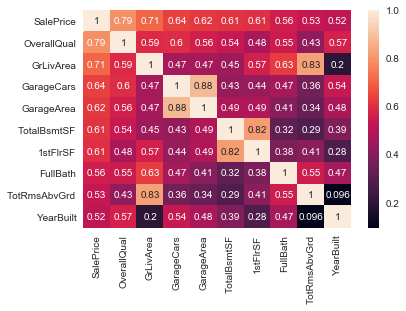

In [16]:
# Correlation matrix with most 10 correlated ones
columns = correlation_matrix.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dataset[columns].values.T)
sns.heatmap(cm, cbar=True, annot=True,
            annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)

GarageCars' and 'GarageArea' are highly correlated and this point out to multicolinearity so we keep one of them
and in this case we keep GarageCars because it's more correlated to SalePrice( about 2 percent!!! :-D )
'TotalBsmtSF' and '1stFloor' also are highly correlated and therfore we keep TotalBsmtSF

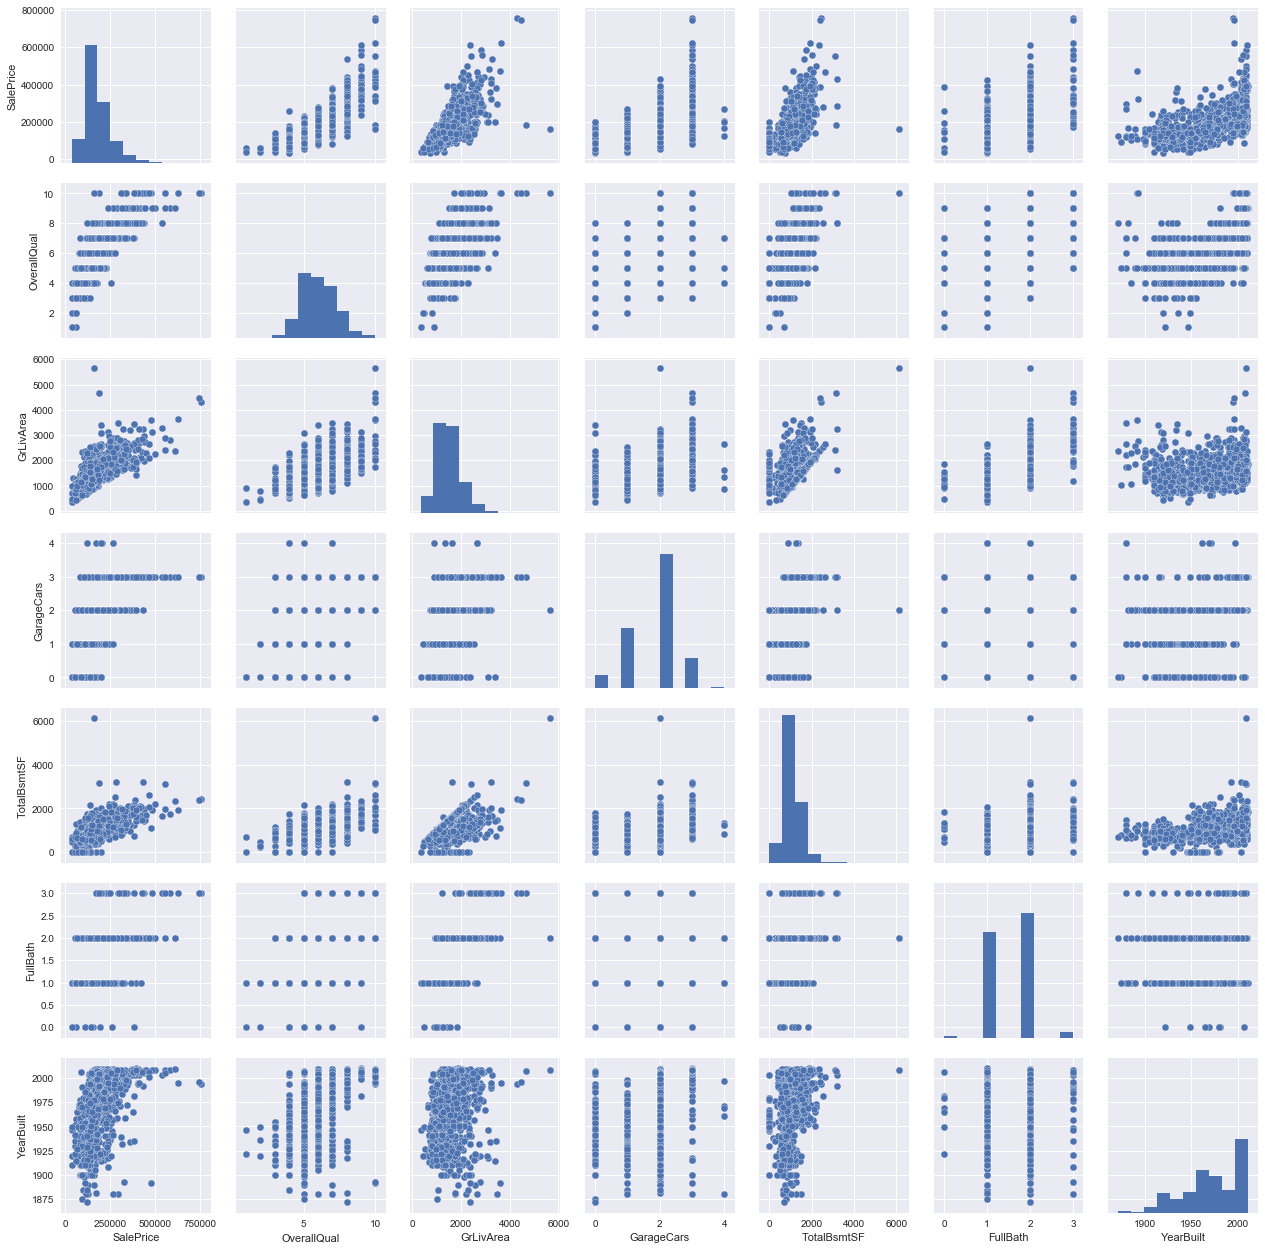

In [17]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(dataset[cols])

## Handling missing values

In [18]:
all_missings = dataset.isnull().sum().sort_values(ascending=False)
percentage = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([all_missings, percentage], axis=1, keys=['Total Missings', 'Missing Percentage'])
missing_data.head(30)

,Total Missings,Missing Percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [19]:
dataset = dataset.drop((missing_data[missing_data['Total Missings'] > 1]).index,1)
dataset = dataset.drop(dataset.loc[dataset['Electrical'].isnull()].index)
dataset.isnull().sum().max()

0

## Handling Outliers - Univariate analysis¶


In [21]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(dataset['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


## Handling Outliers - Bivariate analysis

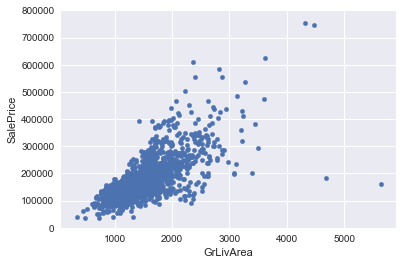

In [23]:
data = pd.concat([dataset['SalePrice'], dataset['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

The two values at bottom-right are outlier we are gonna remove them

In [26]:
dataset.sort_values(by='GrLivArea', ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [27]:
dataset = dataset.drop(dataset[dataset['Id']==1298].index)
dataset = dataset.drop(dataset[dataset['Id']==523].index)

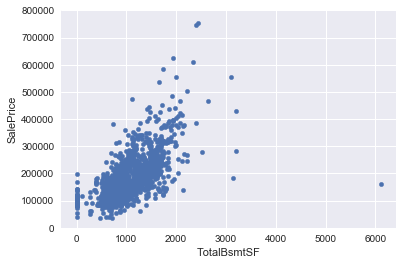

In [28]:
data = pd.concat([dataset['SalePrice'], dataset['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));

In [31]:
dataset.sort_values(by='TotalBsmtSF', ascending=False)[:1]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000


In [32]:
dataset = dataset.drop(dataset[dataset['Id']==1299].index)

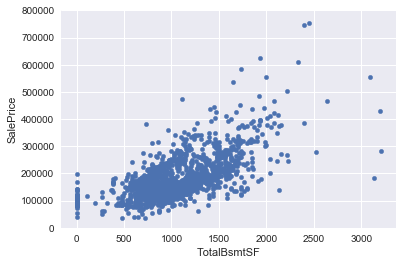

In [34]:
data = pd.concat([dataset['SalePrice'], dataset['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));

## Check for Linear Regression Assumptions

### NORMALITY 

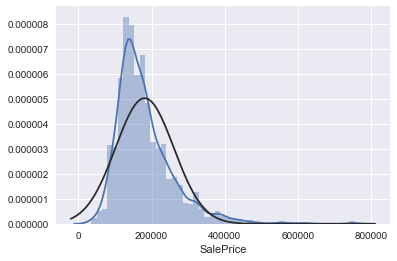

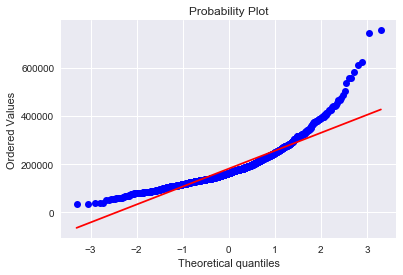

In [40]:
sns.distplot(dataset['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(dataset['SalePrice'],plot=plt)

SalePrice is not normal and has Positive skewness
we are gonna normal it with log transformation( because of positive skewness )

In [41]:
dataset['SalePrice'] = np.log(dataset['SalePrice'])

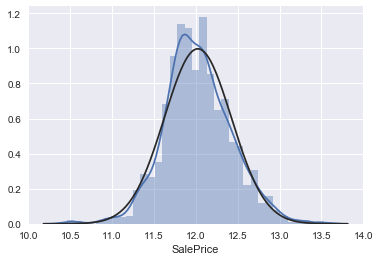

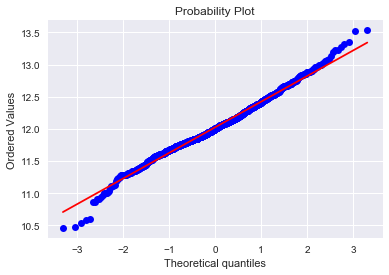

In [43]:
# Let's plot it again
sns.distplot(dataset['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(dataset['SalePrice'], plot=plt)

Well Done!

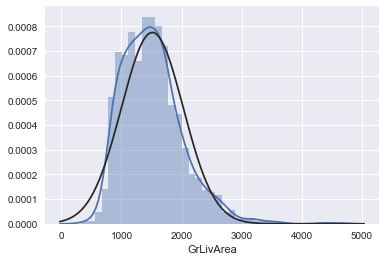

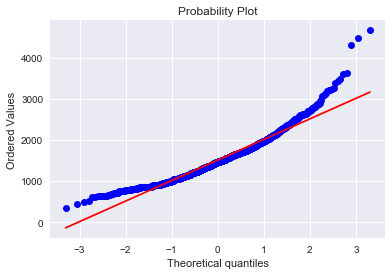

In [44]:
sns.distplot(dataset['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(dataset['GrLivArea'], plot=plt)

In [45]:
dataset['GrLivArea'] = np.log(dataset['GrLivArea'])

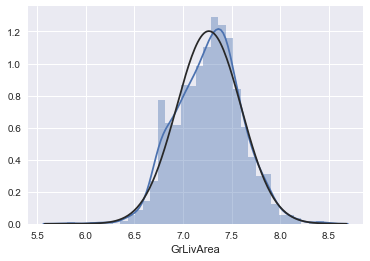

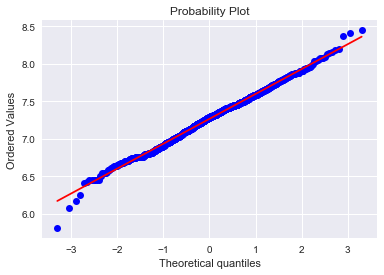

In [49]:
sns.distplot(dataset['GrLivArea'], fit=norm)
plt.figure()
res = stats.probplot(dataset['GrLivArea'], plot=plt)

Ok 2 go 1 left..

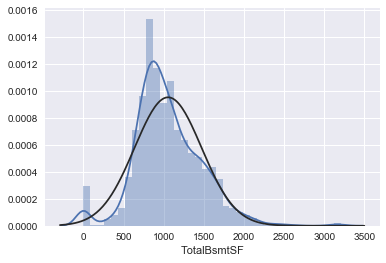

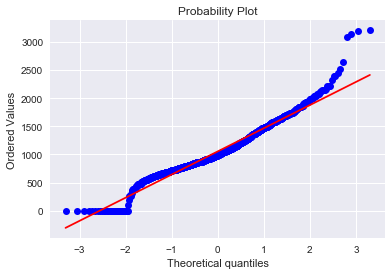

In [50]:
sns.distplot(dataset['TotalBsmtSF'], fit=norm)
plt.figure()
res = stats.probplot(dataset['TotalBsmtSF'], plot=plt)

We have some houses without basement value so we apply log transformation on houses with no zero value of basement

In [54]:
dataset['HasBsmt'] = pd.Series(len(dataset['TotalBsmtSF']), index=dataset.index)
dataset['HasBsmt'] = 0 
dataset.loc[dataset['TotalBsmtSF']>0,'HasBsmt'] = 1

In [55]:
# Transforming the data
dataset.loc[dataset['HasBsmt']==1, 'TotalBsmtSF'] = np.log(dataset['TotalBsmtSF'])

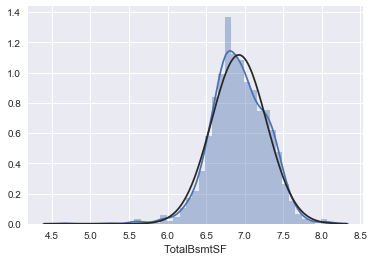

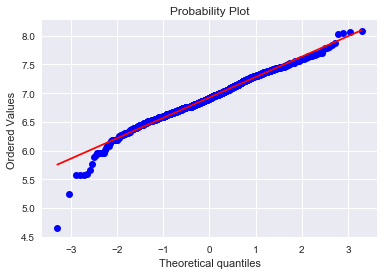

In [56]:
sns.distplot(dataset[dataset['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm)
plt.figure()
res = stats.probplot(dataset[dataset['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

## HOMOSCEDASTICITY

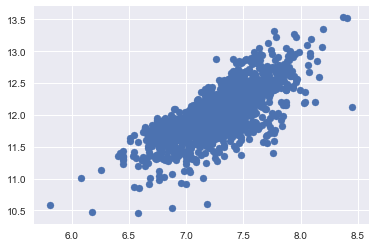

In [59]:
plt.scatter(dataset['GrLivArea'], dataset['SalePrice']);

Heteroscedasticity fixed!

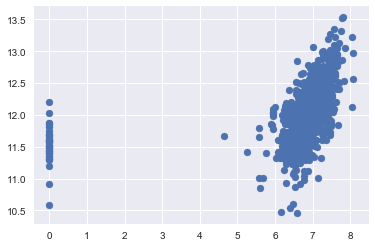

In [60]:
plt.scatter(dataset['TotalBsmtSF'], dataset['SalePrice'])

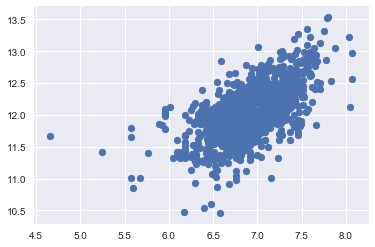

In [61]:
plt.scatter(dataset[dataset['TotalBsmtSF']>0]['TotalBsmtSF'], dataset[dataset['TotalBsmtSF']>0]['SalePrice']);

In [62]:
# Next we can work on Dummy variables...

## FIN